In [5]:
import matplotlib.pyplot as plt
import yfinance as yf

from fbprophet import Prophet

In [6]:
df = yf.download('BTC-USD', start='2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [9]:
df = df.reset_index()

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [12]:
df[['ds', 'y']] = df[['Date', 'Adj Close']]

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,2017-01-01,998.325012
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,2017-01-02,1021.750000
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,2017-01-03,1043.839966
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,2017-01-04,1154.729980
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,2017-01-05,1013.380005


In [14]:
model = Prophet()

In [15]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = model.make_future_dataframe(365)

In [17]:
forecast = model.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,-4019.115893,-7635.309349,3970.684562,-4019.115893,-4019.115893,2275.751695,2275.751695,2275.751695,-3.308131,-3.308131,-3.308131,2279.059826,2279.059826,2279.059826,0.0,0.0,0.0,-1743.364199
1,2017-01-02,-3976.713845,-7782.056244,4397.679220,-3976.713845,-3976.713845,2468.107058,2468.107058,2468.107058,23.719170,23.719170,23.719170,2444.387888,2444.387888,2444.387888,0.0,0.0,0.0,-1508.606787
2,2017-01-03,-3934.311796,-7232.147160,5176.640164,-3934.311796,-3934.311796,2602.603774,2602.603774,2602.603774,8.430026,8.430026,8.430026,2594.173749,2594.173749,2594.173749,0.0,0.0,0.0,-1331.708021
3,2017-01-04,-3891.909747,-6931.819138,4956.315844,-3891.909747,-3891.909747,2717.042652,2717.042652,2717.042652,-9.402221,-9.402221,-9.402221,2726.444873,2726.444873,2726.444873,0.0,0.0,0.0,-1174.867095
4,2017-01-05,-3849.507698,-6952.532564,5015.294642,-3849.507698,-3849.507698,2791.738712,2791.738712,2791.738712,-47.761691,-47.761691,-47.761691,2839.500403,2839.500403,2839.500403,0.0,0.0,0.0,-1057.768986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,2022-07-19,92064.731847,76765.489029,101670.492633,82173.888792,102871.560270,-3676.186479,-3676.186479,-3676.186479,8.430026,8.430026,8.430026,-3684.616505,-3684.616505,-3684.616505,0.0,0.0,0.0,88388.545368
2022,2022-07-20,92176.592957,76589.037543,101210.172935,82259.033499,103025.116296,-3539.771591,-3539.771591,-3539.771591,-9.402221,-9.402221,-9.402221,-3530.369370,-3530.369370,-3530.369370,0.0,0.0,0.0,88636.821367
2023,2022-07-21,92288.454068,76942.237460,102134.291586,82344.178207,103178.672322,-3411.471507,-3411.471507,-3411.471507,-47.761691,-47.761691,-47.761691,-3363.709817,-3363.709817,-3363.709817,0.0,0.0,0.0,88876.982561
2024,2022-07-22,92400.315178,77965.081058,102202.425372,82420.429549,103320.142908,-3192.172264,-3192.172264,-3192.172264,-5.549261,-5.549261,-5.549261,-3186.623003,-3186.623003,-3186.623003,0.0,0.0,0.0,89208.142914


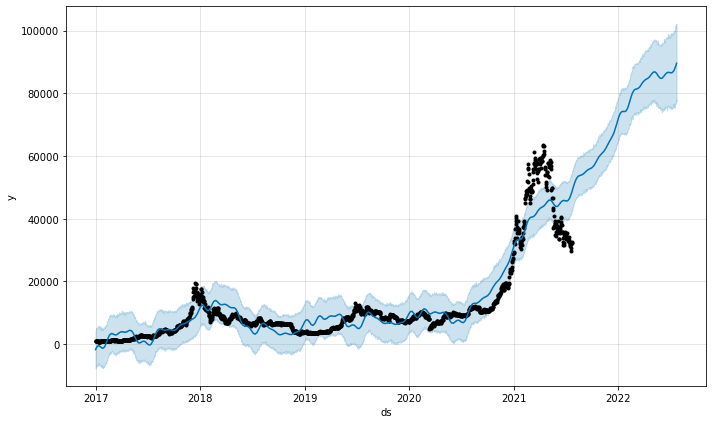

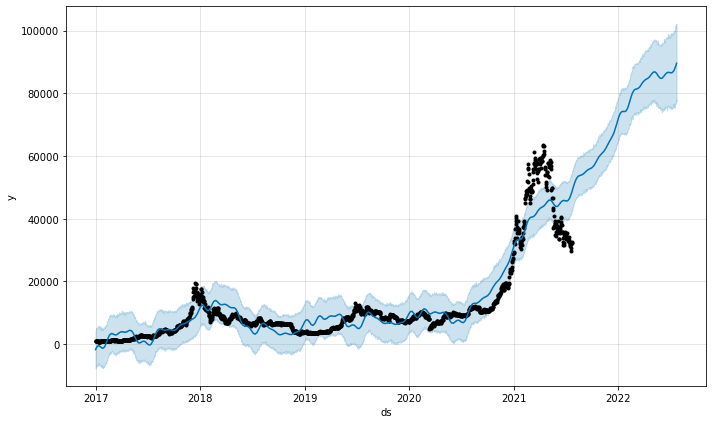

In [19]:
model.plot(forecast)

In [3]:
from prophet.diagnostics import performance_metrics
forcast = performance_metrics(df_cv)
forcast.head()

NameError: name 'df_cv' is not defined